In [ ]:
!pip install pytesseract  -q

import pytesseract
import cv2
import matplotlib.pyplot as plt
from IPython.display import Image

### Detect

In [1]:
!unzip /content/drive/MyDrive/datasets/car_plate/archive.zip -d /content/dataset

Archive:  /content/drive/MyDrive/datasets/car_plate/archive.zip
  inflating: /content/dataset/annotations/Cars0.xml  
  inflating: /content/dataset/annotations/Cars1.xml  
  inflating: /content/dataset/annotations/Cars10.xml  
  inflating: /content/dataset/annotations/Cars100.xml  
  inflating: /content/dataset/annotations/Cars101.xml  
  inflating: /content/dataset/annotations/Cars102.xml  
  inflating: /content/dataset/annotations/Cars103.xml  
  inflating: /content/dataset/annotations/Cars104.xml  
  inflating: /content/dataset/annotations/Cars105.xml  
  inflating: /content/dataset/annotations/Cars106.xml  
  inflating: /content/dataset/annotations/Cars107.xml  
  inflating: /content/dataset/annotations/Cars108.xml  
  inflating: /content/dataset/annotations/Cars109.xml  
  inflating: /content/dataset/annotations/Cars11.xml  
  inflating: /content/dataset/annotations/Cars110.xml  
  inflating: /content/dataset/annotations/Cars111.xml  
  inflating: /content/dataset/annotations/Cars

In [2]:
!unzip /content/drive/MyDrive/datasets/car_plate/detected_images.zip -d /content/yolo_detection

Archive:  /content/drive/MyDrive/datasets/car_plate/detected_images.zip
   creating: /content/yolo_detection/content/yolov5/runs/detect/exp4/
  inflating: /content/yolo_detection/content/yolov5/runs/detect/exp4/Cars428.png  
  inflating: /content/yolo_detection/content/yolov5/runs/detect/exp4/Cars104.png  
  inflating: /content/yolo_detection/content/yolov5/runs/detect/exp4/Cars285.png  
  inflating: /content/yolo_detection/content/yolov5/runs/detect/exp4/Cars366.png  
  inflating: /content/yolo_detection/content/yolov5/runs/detect/exp4/Cars219.png  
  inflating: /content/yolo_detection/content/yolov5/runs/detect/exp4/Cars206.png  
  inflating: /content/yolo_detection/content/yolov5/runs/detect/exp4/Cars63.png  
  inflating: /content/yolo_detection/content/yolov5/runs/detect/exp4/Cars182.png  
  inflating: /content/yolo_detection/content/yolov5/runs/detect/exp4/Cars64.png  
  inflating: /content/yolo_detection/content/yolov5/runs/detect/exp4/Cars246.png  
  inflating: /content/yolo_det

In [3]:
with open("/content/yolo_detection/content/yolov5/runs/detect/exp4/labels/Cars0.txt") as f:
  line = f.readlines()

aux = line[0].rstrip()
aux.split()

['0', '0.648', '0.554105', '0.392', '0.175373']

In [6]:
# list saved .txt
!ls /content/yolo_detection/content/yolov5/runs/detect/exp4/labels

Cars0.txt    Cars167.txt  Cars231.txt  Cars299.txt  Cars363.txt  Cars427.txt
Cars100.txt  Cars168.txt  Cars232.txt  Cars29.txt   Cars364.txt  Cars428.txt
Cars101.txt  Cars169.txt  Cars233.txt  Cars2.txt    Cars365.txt  Cars429.txt
Cars103.txt  Cars16.txt   Cars234.txt  Cars300.txt  Cars366.txt  Cars42.txt
Cars104.txt  Cars170.txt  Cars235.txt  Cars301.txt  Cars367.txt  Cars430.txt
Cars105.txt  Cars171.txt  Cars236.txt  Cars302.txt  Cars368.txt  Cars431.txt
Cars106.txt  Cars172.txt  Cars237.txt  Cars303.txt  Cars369.txt  Cars432.txt
Cars107.txt  Cars173.txt  Cars238.txt  Cars304.txt  Cars36.txt	 Cars43.txt
Cars108.txt  Cars174.txt  Cars239.txt  Cars305.txt  Cars370.txt  Cars45.txt
Cars109.txt  Cars175.txt  Cars23.txt   Cars306.txt  Cars371.txt  Cars46.txt
Cars10.txt   Cars176.txt  Cars240.txt  Cars307.txt  Cars372.txt  Cars47.txt
Cars110.txt  Cars177.txt  Cars241.txt  Cars308.txt  Cars373.txt  Cars48.txt
Cars111.txt  Cars178.txt  Cars242.txt  Cars309.txt  Cars374.txt  Cars49.txt
Cars112

In [30]:
# read .txt to get x,y,w,h of ALPR
def read_txt(filepath):
  f = open(filepath, 'r')
  lines = f.readlines()
        
  print(f"lines: {lines}")
  # read objects from each line of .txt
  objects = []
  for line in lines:
    print(f"line: {line}")
    line=line.rstrip()
    print(f"line 2: {line}")
    obj = [int(float(str(i))) for i in line.split(' ')]
    print(f"obj: {obj}")
    objects.append(obj)
  #print(objects)
  return objects

In [36]:
line = "0 100 200 300 400"
objects = []
for i in line.split(' '):
  obj = [int(float(i))]
  objects.append(obj)
print(objects)

[[0], [100], [200], [300], [400]]


In [31]:
read_txt("/content/yolo_detection/content/yolov5/runs/detect/exp4/labels/Cars1.txt")

lines: ['0 0.49375 0.572581 0.3175 0.129032\n']
line: 0 0.49375 0.572581 0.3175 0.129032

line 2: 0 0.49375 0.572581 0.3175 0.129032
obj: [0, 0, 0, 0, 0]


[[0, 0, 0, 0, 0]]

In [10]:
DETECT_PATH = '/content/yolo_detection/content/yolov5/runs/detect/exp4/'
IMG_NAME    = 'Cars0'

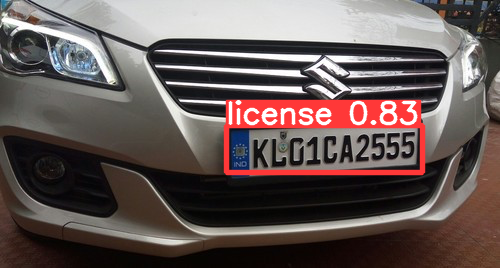

In [12]:
Image(DETECT_PATH+IMG_NAME+'.png')

lines: ['0 0.648 0.554105 0.392 0.175373\n']
line: 0 0.648 0.554105 0.392 0.175373

line 2: 0 0.648 0.554105 0.392 0.175373
obj: [0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
c: 0
x: 0
y: 0
w: 0
h: 0
0 0 0 0


ValueError: ignored

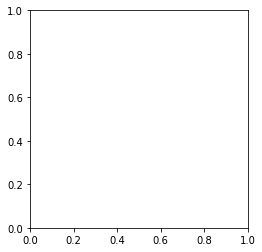

In [40]:
img = cv2.imread(DETECT_PATH+IMG_NAME+'.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
lics = read_txt(DETECT_PATH +'labels/'+IMG_NAME+'.txt')

for lic in lics:
    print(lic)
    c, x, y, w, h = lic
    print(f"c: {c}")
    print(f"x: {x}")
    print(f"y: {y}")
    print(f"w: {w}")
    print(f"h: {h}")
    print(x,y,w,h) # center of the bounding box
    img_alpr = img[y-int(h/2):y+int(h/2),x-int(w/2):x+int(w/2)]
    img_alpr = img[10:8,2:1]
    plt.imshow(img_alpr)
    txt = pytesseract.image_to_string(img_alpr)
    print(txt)
    
#    img = cv2.putText(img, txt, (x-int(w/2),y-int(h/2)), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 2)   
#cv2.imwrite('alpr_us1.jpg', img)